In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
import yfinance as yf
import tensorflow as tf

In [5]:
ticker = 'AAPL'  # Example: Apple Inc.
df = yf.download(ticker, start='2010-01-01', end='2023-01-01')

print(df.head())



[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.447412  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.458560  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.355826  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.344078  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.386254  447610800


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447412,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458560,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344078,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386254,447610800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,51.297746,51.869747,50.731996,51.321186,48.954914,2.562707e+08
std,47.328490,47.938843,46.732224,47.357062,47.326300,2.225648e+08
min,6.870357,7.000000,6.794643,6.858929,5.785830,3.519590e+07
25%,18.966697,19.121697,18.780179,18.967589,16.453294,1.023541e+08
50%,29.756250,29.981250,29.561250,29.815000,27.101384,1.666698e+08
75%,56.983748,57.309999,56.469999,56.777499,54.381593,3.456643e+08
max,182.630005,182.940002,179.119995,182.009995,179.076553,1.880998e+09


In [9]:
df.shape

(3272, 6)

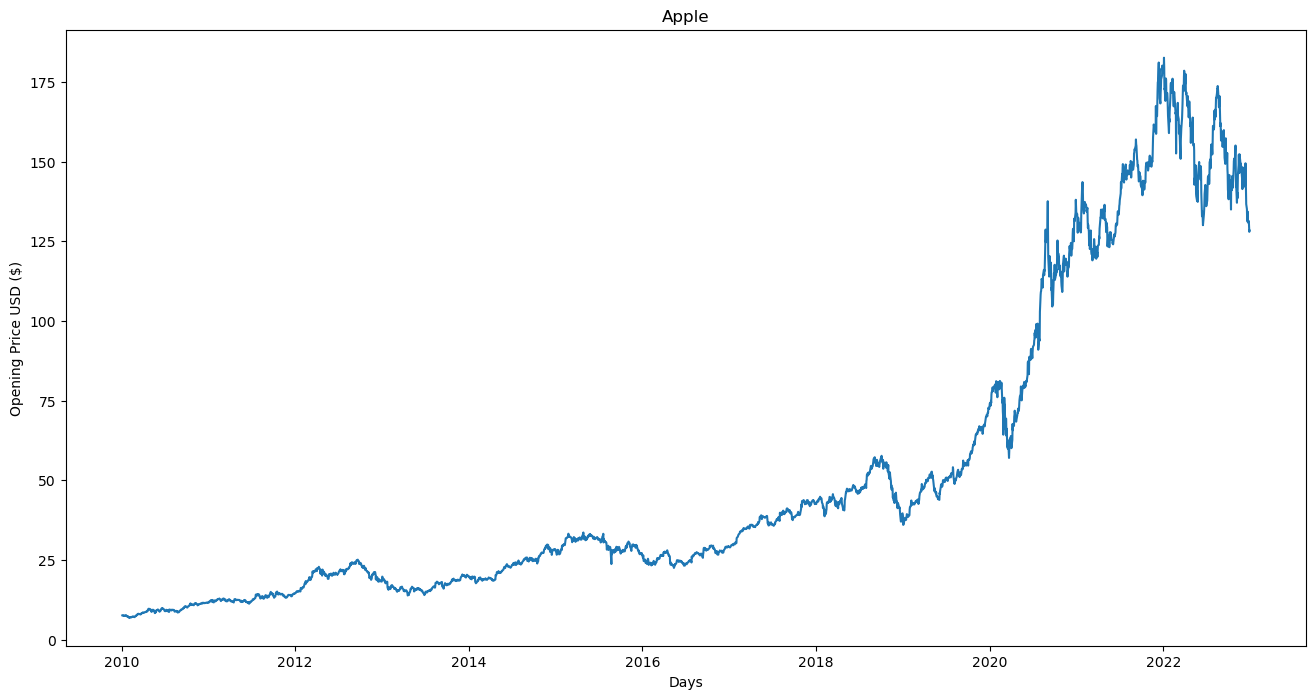

In [10]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()
#opening prices


[*********************100%***********************]  1 of 1 completed


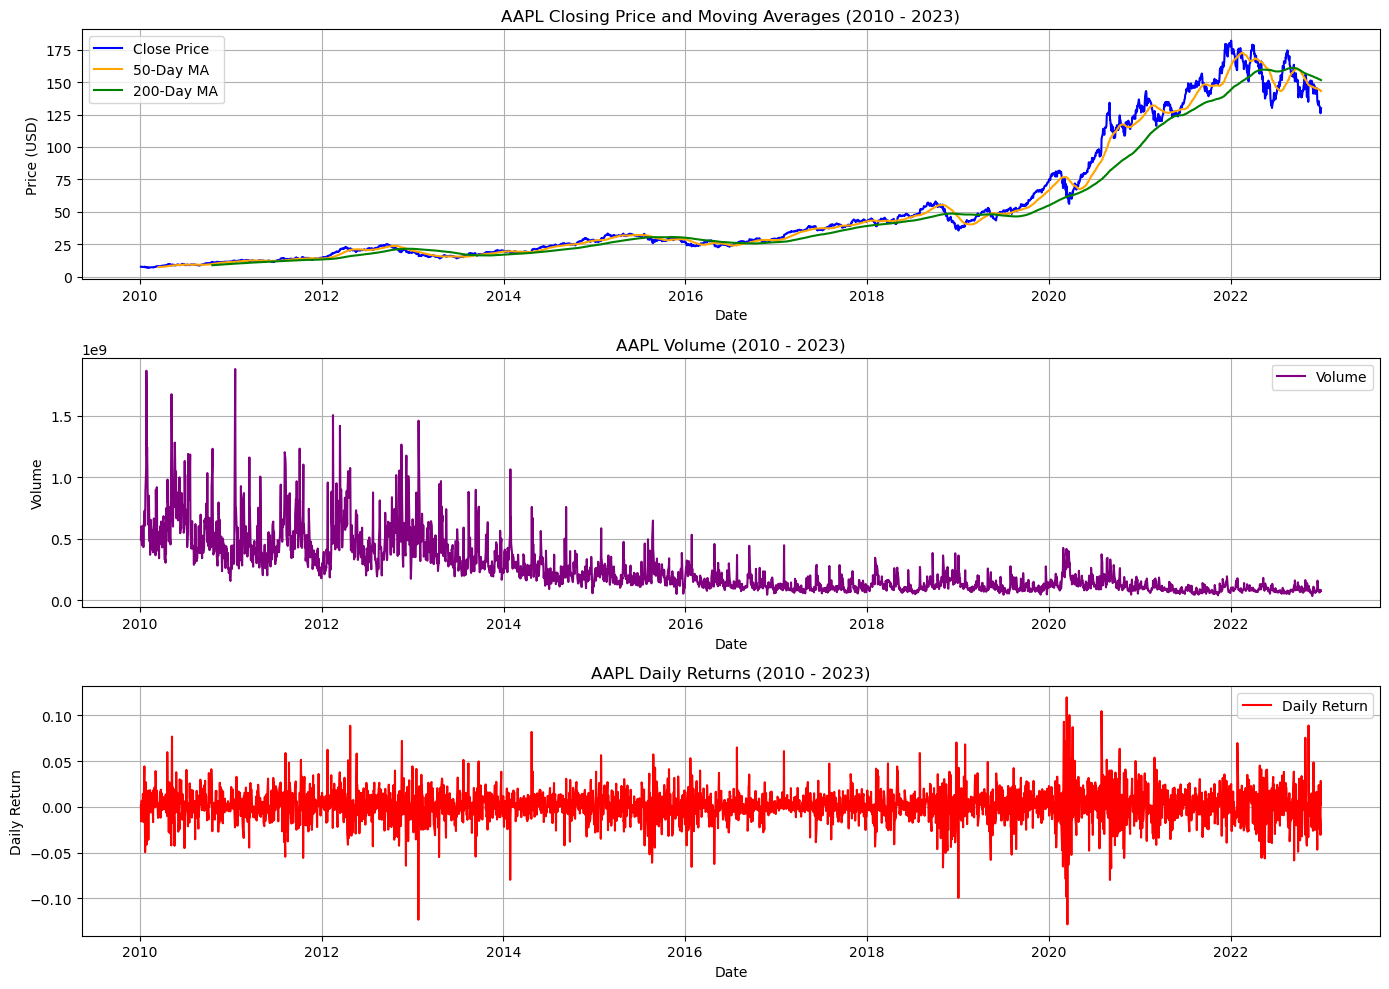

In [74]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download the historical data
ticker = 'AAPL'
df = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Calculate moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Create subplots
plt.figure(figsize=(14, 10))

# Plot Closing Price
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA_50'], label='50-Day MA', color='orange')
plt.plot(df['MA_200'], label='200-Day MA', color='green')
plt.title(f'{ticker} Closing Price and Moving Averages (2010 - 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Plot Volume
plt.subplot(3, 1, 2)
plt.plot(df['Volume'], label='Volume', color='purple')
plt.title(f'{ticker} Volume (2010 - 2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

# Plot Daily Returns
df['Daily Return'] = df['Close'].pct_change()
plt.subplot(3, 1, 3)
plt.plot(df['Daily Return'], label='Daily Return', color='red')
plt.title(f'{ticker} Daily Returns (2010 - 2023)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\anshr\AppData\Local\Temp\ipykernel_10508\1081821000.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


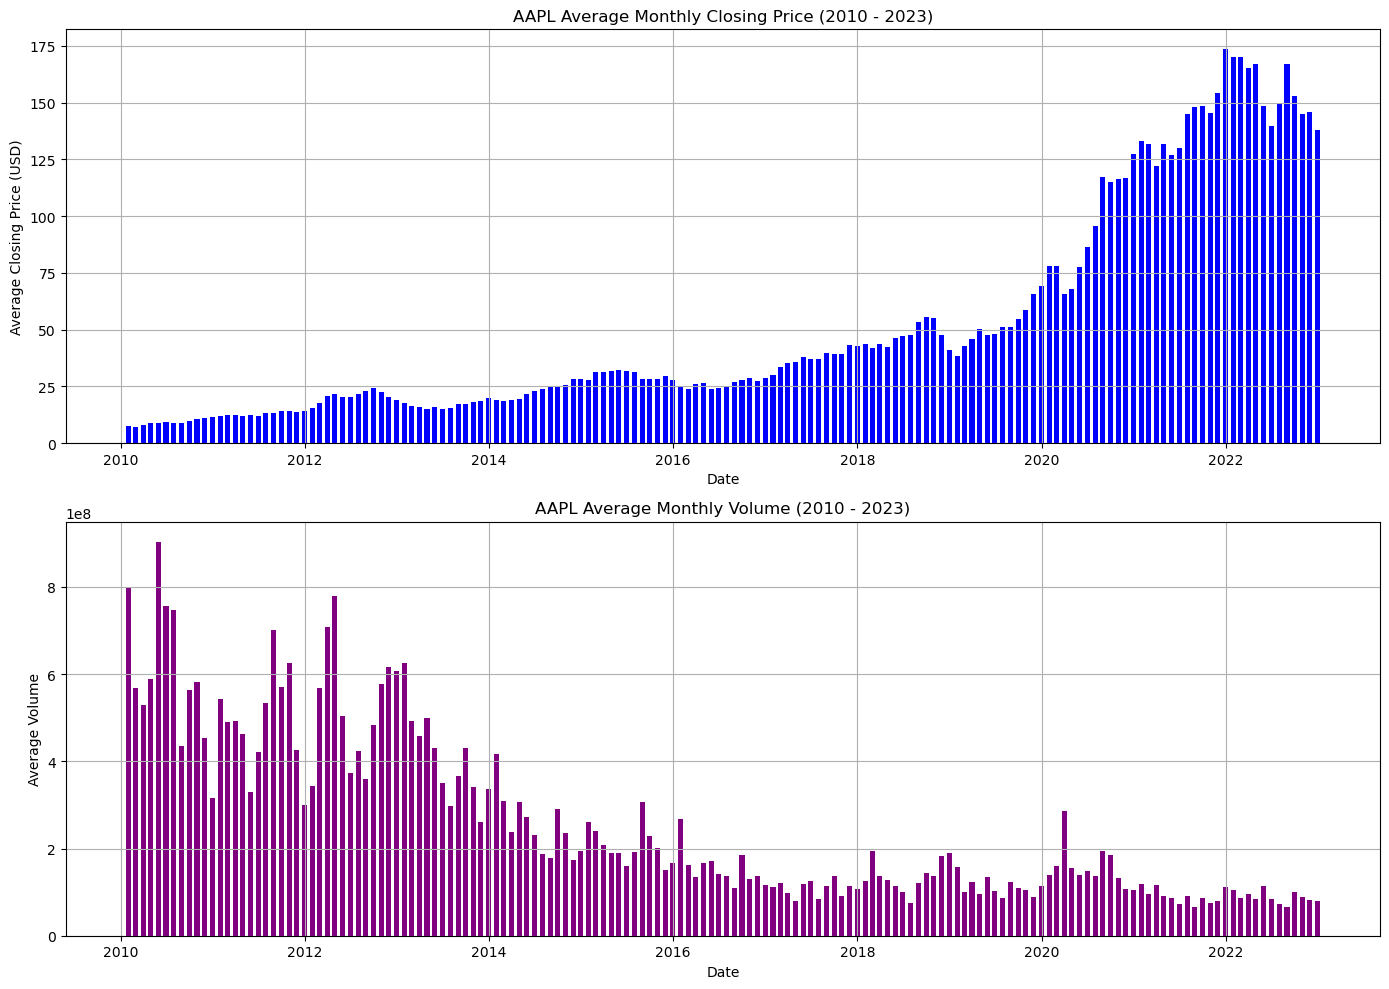

In [76]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download the historical data
ticker = 'AAPL'
df = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Resample data to get monthly averages for Close and Volume
df_monthly = df.resample('M').mean()

# Create subplots for bar charts
plt.figure(figsize=(14, 10))

# Bar plot for average monthly closing prices
plt.subplot(2, 1, 1)
plt.bar(df_monthly.index, df_monthly['Close'], color='blue', width=20)
plt.title(f'{ticker} Average Monthly Closing Price (2010 - 2023)')
plt.xlabel('Date')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)

# Bar plot for average monthly volume
plt.subplot(2, 1, 2)
plt.bar(df_monthly.index, df_monthly['Volume'], color='purple', width=20)
plt.title(f'{ticker} Average Monthly Volume (2010 - 2023)')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


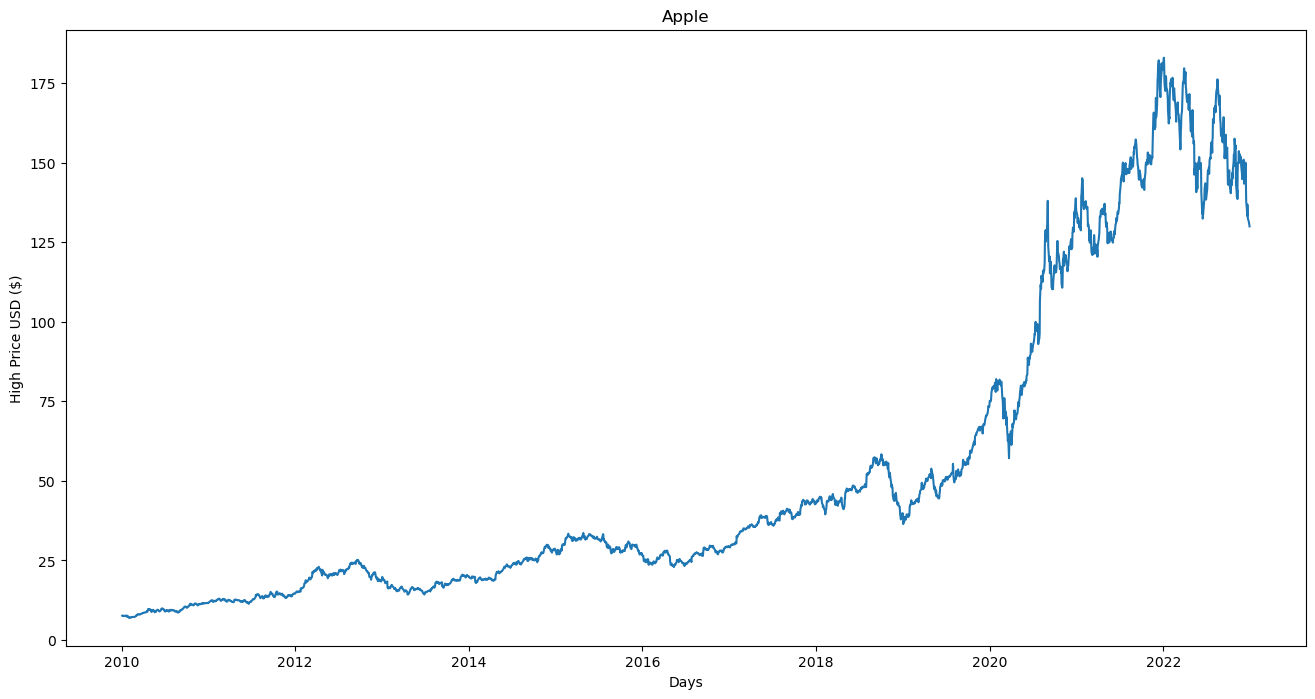

In [11]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()
#high price 

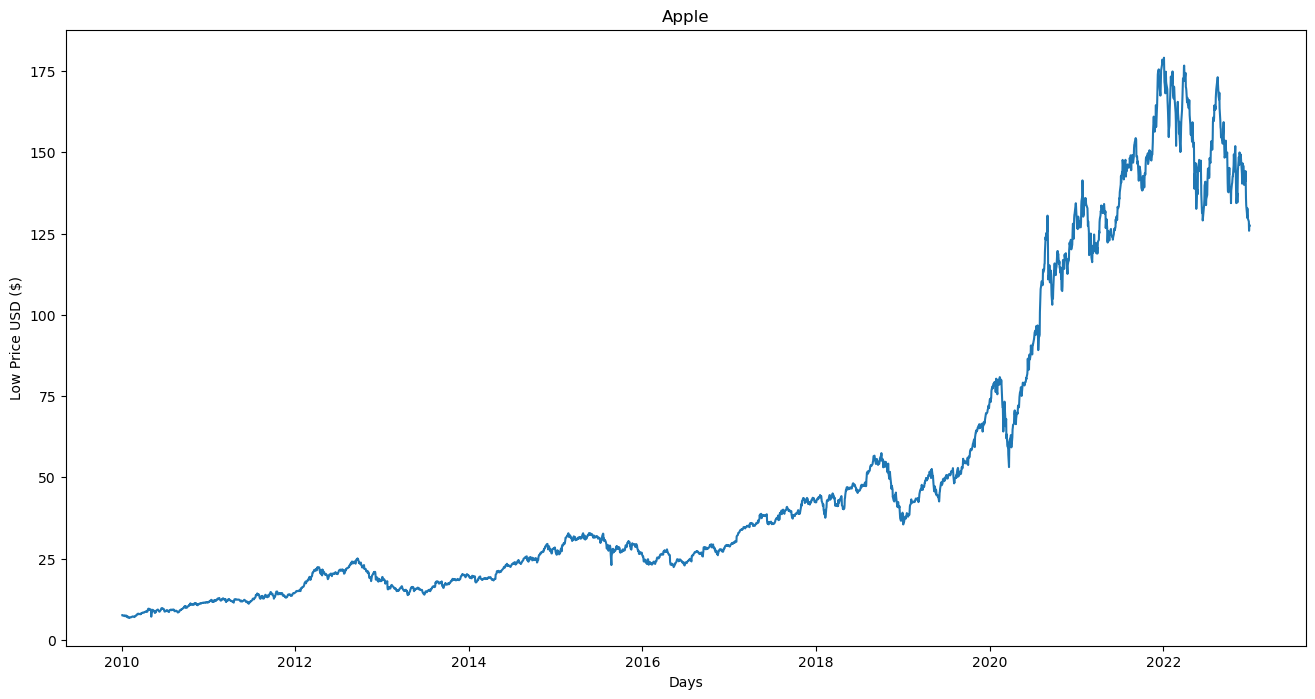

In [12]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()
#low price


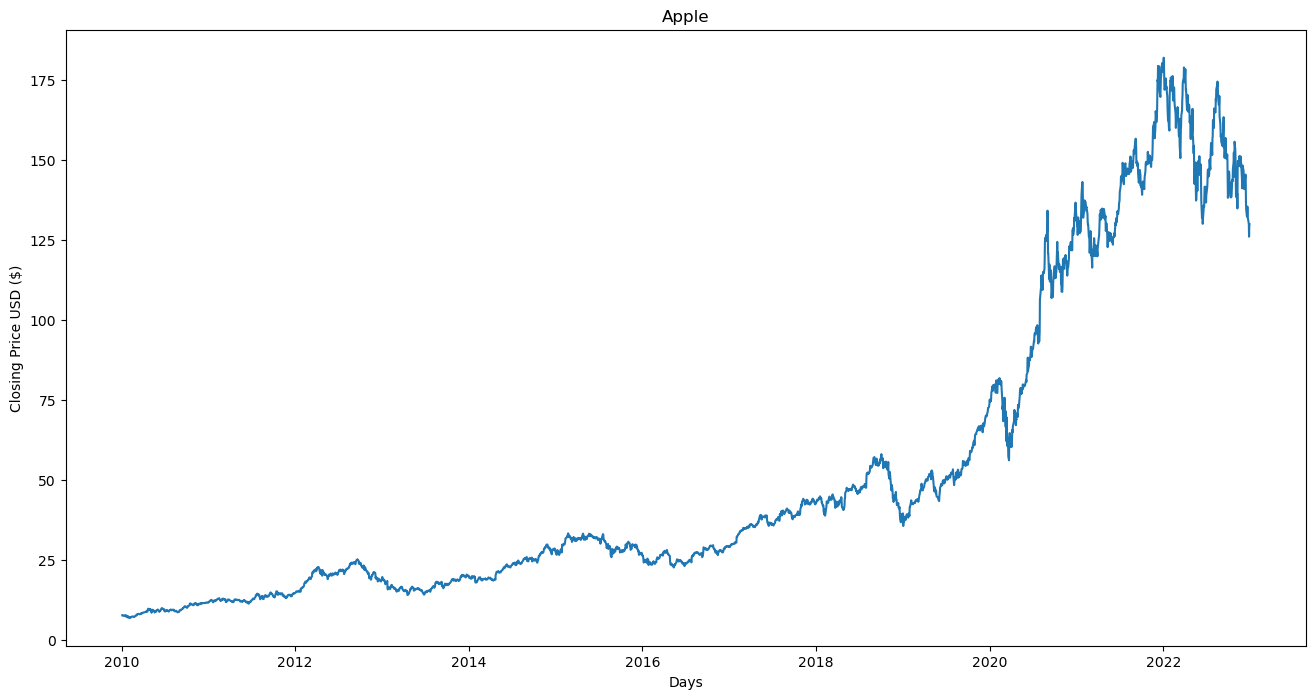

In [13]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()
#closing price

In [14]:
df2 = df['Close']

In [15]:
df2.tail()

Date
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, dtype: float64

In [16]:
df2 = pd.DataFrame(df2)   

In [17]:
df2.tail()

,Close
Date,
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


In [18]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [19]:
df2.tail()

,Close,Prediction
Date,,
2022-12-23,131.860001,NaN
2022-12-27,130.029999,NaN
2022-12-28,126.040001,NaN
2022-12-29,129.610001,NaN
2022-12-30,129.929993,NaN


In [20]:
X =  np.array(df2.drop(['Prediction'] , axis=1))[:-future_days]
print(X)

[[  7.64321423]
 [  7.65642881]
 [  7.53464317]
 ...
 [165.3500061 ]
 [164.86999512]
 [164.91999817]]


In [21]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[  9.04821396   9.17428589   9.31535721 ... 126.04000092 129.61000061
 129.92999268]


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


R² score: 0.9421536737416156


In [62]:
# Initialize the models
dt_model = DecisionTreeRegressor()
lr_model = LinearRegression()
# Train the models
dt_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
# Make predictions
dt_predictions = dt_model.predict(x_test)
lr_predictions = lr_model.predict(x_test)

# Calculate R² score for each model
dt_r2 = r2_score(y_test, dt_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Decision Tree Regressor R² score:", dt_r2)
print("Linear Regression R² score:", lr_r2)

Decision Tree Regressor R² score: 0.9504596620206603
Linear Regression R² score: 0.9421536737416156


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [64]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [66]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[160.61999512],
       [163.97999573],
       [165.38000488],
       [168.82000732],
       [170.21000671],
       [174.07000732],
       [174.72000122],
       [175.6000061 ],
       [178.96000671],
       [177.77000427],
       [174.61000061],
       [174.30999756],
       [178.44000244],
       [175.05999756],
       [171.83000183],
       [172.13999939],
       [170.08999634],
       [165.75      ],
       [167.66000366],
       [170.3999939 ],
       [165.28999329],
       [165.07000732],
       [167.3999939 ],
       [167.22999573],
       [166.41999817],
       [161.78999329],
       [162.88000488],
       [156.80000305],
       [156.57000732],
       [163.63999939],
       [157.6499939 ],
       [157.96000671],
       [159.47999573],
       [166.02000427],
       [156.77000427],
       [157.27999878],
       [152.05999756],
       [154.50999451],
       [146.5       ],
       [142.55999756],
       [147.11000061],
       [145.53999329],
       [149.24000549],
       [140

In [68]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[169.24000549 168.49000549 172.1000061  173.19000244 173.02999878
 174.55000305 174.1499939  171.52000427 167.57000732 167.22999573
 154.59500122 170.02999878 163.61999512 148.83999634 158.91000366
 157.22000122 173.02999878 130.02999878 154.52999878 155.96000671
 154.46000671 154.08999634 163.42999268 153.83999634 155.30999756
 152.36999512 150.69999695 154.47999573 170.33000183 153.72000122
 152.74000549 150.42999268 150.77000427 151.75999451 149.83999634
 142.47999573 138.19999695 142.44999695 146.1000061  150.6499939
 145.42999268 175.63999939 140.41999817 138.97999573 138.33999634
 142.99000549 130.46000671 142.41000366 143.75       143.86000061
 143.38999939 147.27000427 152.59500122 152.33999634 168.88000488
 162.09000397 152.59500122 153.33999634 150.6499939  145.02999878
 138.88000488 138.38000488 138.91999817 139.5        134.86999512
 146.86999512 143.24000549 148.27999878 149.41499329 149.41499329
 150.72000122 151.28999329 148.00999451 150.17999268 151.07000732
 139.949996

In [70]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\anshr\AppData\Local\Temp\ipykernel_10508\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


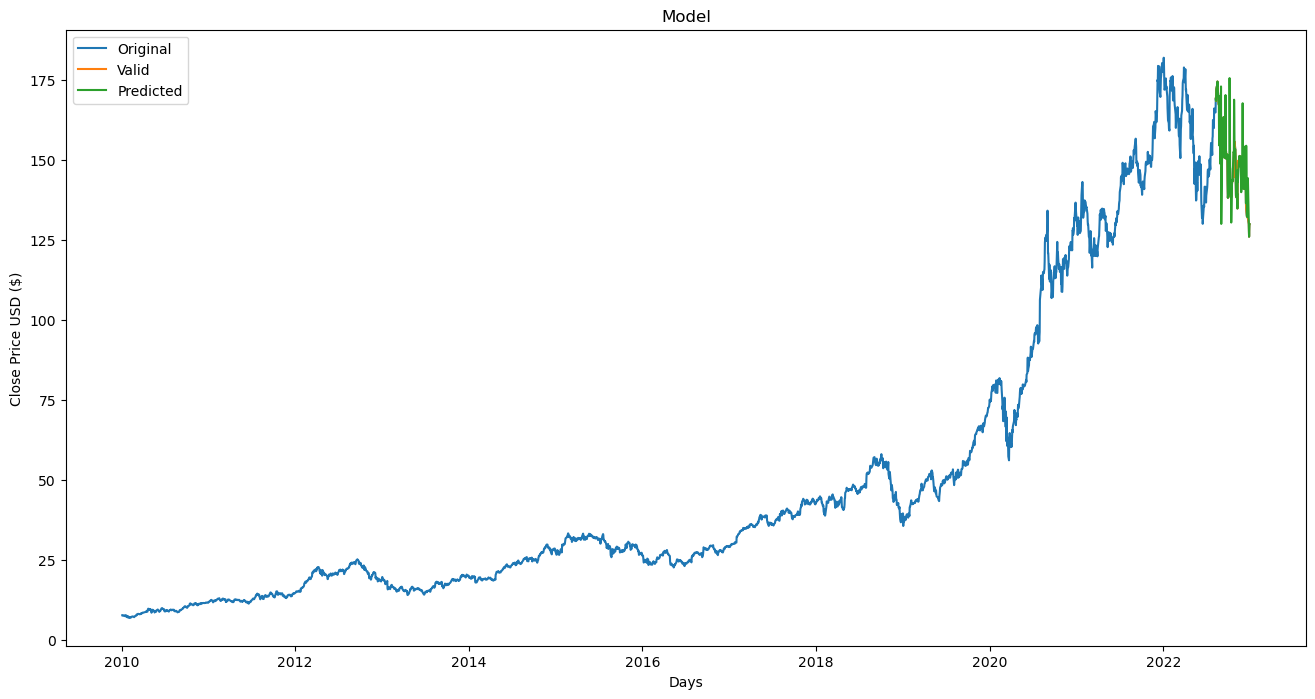

In [72]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
#LSTM


In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df=data
df.head()

In [ ]:
data = load_data('goog')
df=data
df.head()

In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

In [ ]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [ ]:
df

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

In [ ]:
#imagine that we are splitting 70% to training dataset and remaining 30% to test dataset

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

In [ ]:
train.head()

In [ ]:
train.head

In [ ]:
# about 1715 dataset had been converted to training dataset

In [ ]:
test.head()

In [ ]:
test.head

In [ ]:
#about 736 dataset had been taken as the test dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

In [ ]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 


In [ ]:
x_train.shape

In [ ]:
#Basically we are using MinMax scaler for normalization of the dataset

In [ ]:
#ML LSTM method of prediction

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary

In [ ]:
model.summary()

In [ ]:
#Training the dataset

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
#Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
#testing the model

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#Making prediction and plotting the graph of predicted vs actual values

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

In [ ]:
#calcution of r2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [ ]:
#RANDOM FOREST METHOD


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Download historical stock data
stock_symbol = 'AAPL'  # Example: Apple Inc.
data = 'AAPL'


In [ ]:
for lag in range(1, 6):  # 5 lagged features
    data[f'Lag_{lag}'] = data['Close'].shift(lag)

# Create a moving average feature
data['MA_5'] = data['Close'].rolling(window=5).mean()

# Drop rows with NaN values (due to shifting and rolling)
data.dropna(inplace=True)

# Prepare features (X) and target variable (y)
X = data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'MA_5']]
y = data['Close']